In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Imports

In [19]:
from main import prepare_data, grid_search, final_train, test
import xgboost as xgb

# Prepare the data

In [20]:
X_train, X_test, y_train, y_test = prepare_data()

# Model

In [21]:
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    enable_categorical=True
)

# Grid Search

In [22]:
_, params = grid_search(model, X_train, y_train)

Starting grid search...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best CV Score (Accuracy): 0.9993405184338273
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 120, 'subsample': 0.8}


# Re-train the model on all the data

In [23]:
model = final_train(params, X_train, y_train)

Starting training...
[0]	validation_0-logloss:0.62955	validation_1-logloss:0.62990
[4]	validation_0-logloss:0.39541	validation_1-logloss:0.39578
[8]	validation_0-logloss:0.26717	validation_1-logloss:0.26757
[12]	validation_0-logloss:0.18951	validation_1-logloss:0.19001
[16]	validation_0-logloss:0.13925	validation_1-logloss:0.13999
[20]	validation_0-logloss:0.10615	validation_1-logloss:0.10713
[24]	validation_0-logloss:0.08225	validation_1-logloss:0.08333
[28]	validation_0-logloss:0.06481	validation_1-logloss:0.06597
[32]	validation_0-logloss:0.05330	validation_1-logloss:0.05457
[36]	validation_0-logloss:0.04313	validation_1-logloss:0.04444
[40]	validation_0-logloss:0.03600	validation_1-logloss:0.03736
[44]	validation_0-logloss:0.03058	validation_1-logloss:0.03197
[48]	validation_0-logloss:0.02601	validation_1-logloss:0.02742
[52]	validation_0-logloss:0.02227	validation_1-logloss:0.02371
[56]	validation_0-logloss:0.01940	validation_1-logloss:0.02088
[60]	validation_0-logloss:0.01718	val

# Test the model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



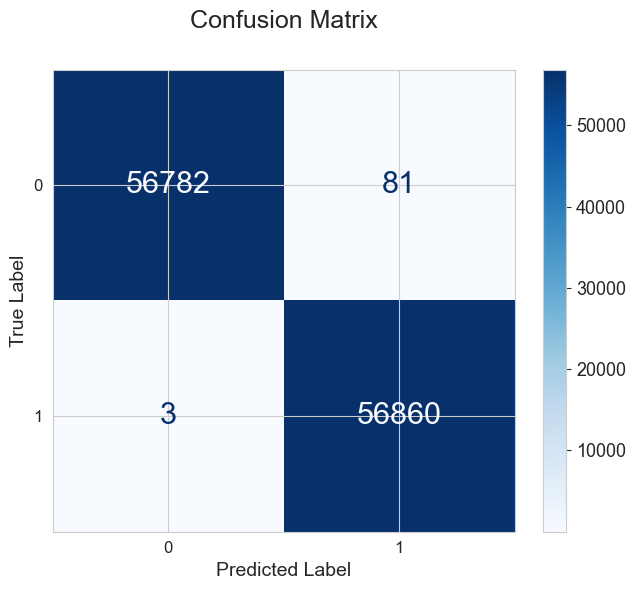

In [24]:
test(model, X_test, y_test)

# Save the model

In [25]:
model.save_model('models/best_model.model')
print("XGBoost model saved successfully.")

XGBoost model saved successfully.
